### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style("whitegrid")
sns.set_palette("pastel")

### EDA ENGLISH ONLY

In [2]:
df = pd.read_csv("../data/english_only_data.csv")
df.head()

,Comment,Sentiment
0,CNN is fake news?????? They won't cover the Hu...,Negative
1,"Russian ruble will continue to slide down, eve...",Negative
2,It doesn’t “reach the flashpoint” it rather wo...,Positive
3,We would rather have Trudeau for life vs being...,Negative
4,President Xi needs to go. He’s causing whole ...,Negative


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Comment    100000 non-null  object
 1   Sentiment  100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [4]:
df.describe()

,Comment,Sentiment
count,100000,100000
unique,99989,2
top,I am sitting in my house watching this video a...,Negative
freq,2,50000


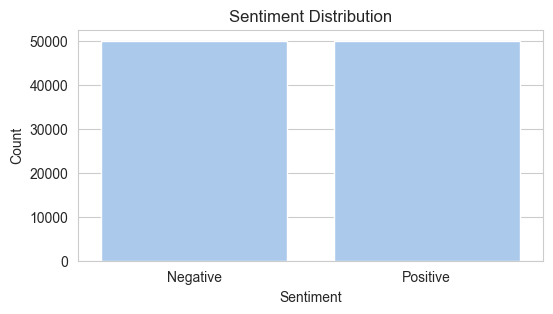

In [5]:
plt.figure(figsize=(6, 3))
ax = sns.countplot(x="Sentiment", data=df)
ax.set_title("Sentiment Distribution")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")
plt.show()

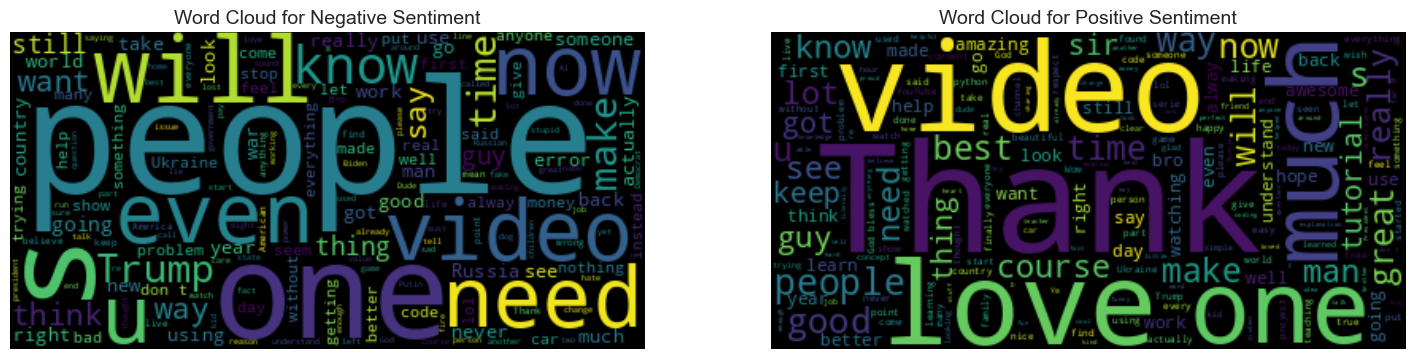

In [6]:

sentiments = df["Sentiment"].unique()
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

for i, sentiment in enumerate(sentiments): 
    text = " ".join(df[df["Sentiment"] == sentiment]["Comment"].astype(str))

    wordcloud = WordCloud(background_color="black").generate(text)
    
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].set_title(f"Word Cloud for {sentiment.capitalize()} Sentiment", fontsize=14)
    axes[i].axis("off")

plt.show()

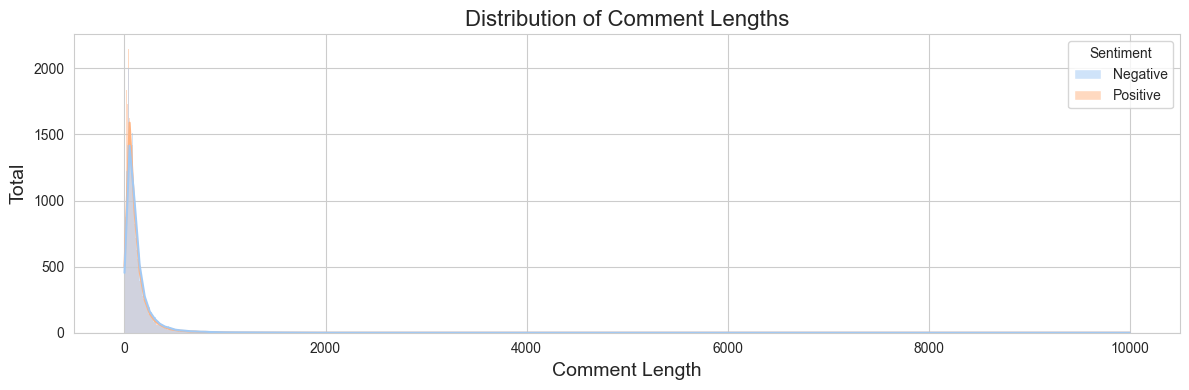

In [7]:
df["length"] = df["Comment"].str.len()
plt.figure(figsize=(12, 4))

sns.histplot(data=df, x="length", hue="Sentiment", kde=True)

plt.title("Distribution of Comment Lengths", fontsize=16)
plt.xlabel("Comment Length", fontsize=14)
plt.ylabel("Total", fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
df.groupby("Sentiment")["length"].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
Negative,50000.0,132.19662,204.694531,1.0,48.0,83.0,148.0,9997.0
Positive,50000.0,116.45756,153.217563,1.0,41.0,75.0,136.0,4321.0


In [9]:
sentiment_mapping = {"Positive": 1, "Negative": 0}
df["Sentiment"] = df["Sentiment"].replace(sentiment_mapping).astype(int)

/var/folders/06/m9zqwbpx0xv34f89bzg3s27c0000gn/T/ipykernel_10999/2434288144.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sentiment"] = df["Sentiment"].replace(sentiment_mapping).astype(int)


In [10]:
df.head()

,Comment,Sentiment,length
0,CNN is fake news?????? They won't cover the Hu...,0,138
1,"Russian ruble will continue to slide down, eve...",0,540
2,It doesn’t “reach the flashpoint” it rather wo...,1,356
3,We would rather have Trudeau for life vs being...,0,59
4,President Xi needs to go. He’s causing whole ...,0,66


In [11]:
df["Sentiment"].value_counts()

Sentiment
0    50000
1    50000
Name: count, dtype: int64

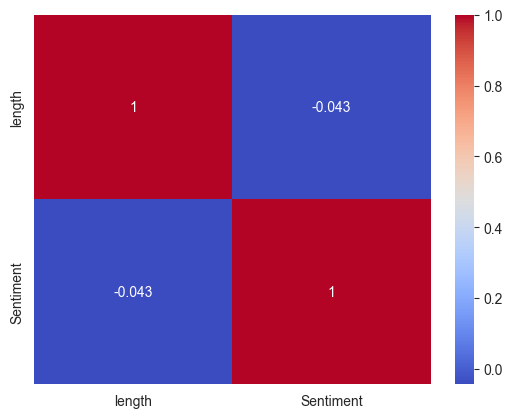

In [12]:
correlation = df[["length", "Sentiment"]].corr(method="pearson")
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

In [13]:
# Weak relationship so will be dropping
df.drop(columns=["length"], inplace=True)

In [14]:
df.head()

,Comment,Sentiment
0,CNN is fake news?????? They won't cover the Hu...,0
1,"Russian ruble will continue to slide down, eve...",0
2,It doesn’t “reach the flashpoint” it rather wo...,1
3,We would rather have Trudeau for life vs being...,0
4,President Xi needs to go. He’s causing whole ...,0


### EDA KOREAN ONLY

In [15]:
df_kor = pd.read_csv("../data/korean_only_data.csv")
df_kor.head()

,Sentiment,Comment
0,negative,거품이 심한 곳
1,negative,머리카락이라기엔 부드럽지 않고 좀 뻣뻣해서 벌레 다리인 거 같기도 하고 안심 반절 ...
2,positive,정말 친절하셨어요! 메가커피는 누가 만들었는지 정말 좋아요
3,negative,"맛 서비스 어느 하나 가격 대비 형편없네요. 깐풍기는 배달 치킨보다도 못하고, 크림..."
4,negative,마감 때쯤 갔는데 손님이 뭘 보든 말든 자기 할 일만 하시던 직원분.. 그냥 안사고...


In [16]:
df_kor.describe()

,Sentiment,Comment
count,100000,100000
unique,2,99999
top,negative,웨이팅이 너무 길어요
freq,50000,2


In [17]:
df_kor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Sentiment  100000 non-null  object
 1   Comment    100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


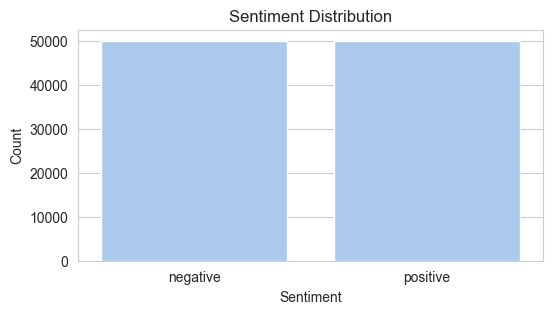

In [18]:
plt.figure(figsize=(6, 3))
ax = sns.countplot(x="Sentiment", data=df_kor)
ax.set_title("Sentiment Distribution")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")
plt.show()

In [19]:
final_df = pd.concat([df, df_kor])
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)
final_df.to_csv("../data/final_data.csv", index=False)